In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

pd.set_option("display.max_columns", 100)
pd.set_option("float_format", "{:.4f}".format)
sns.set_style("whitegrid")

# Data Loading 

In [2]:
_data = load_iris()
data = _data["data"]
feature_names = _data["feature_names"]

df = pd.DataFrame(data, columns=feature_names)
df["target"] = _data["target"]

target_names = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}
df["target"] = df["target"].map(target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1000,3.5000,1.4000,0.2000,Iris-setosa
1,4.9000,3.0000,1.4000,0.2000,Iris-setosa
2,4.7000,3.2000,1.3000,0.2000,Iris-setosa
3,4.6000,3.1000,1.5000,0.2000,Iris-setosa
4,5.0000,3.6000,1.4000,0.2000,Iris-setosa


# EDA

## Correlation

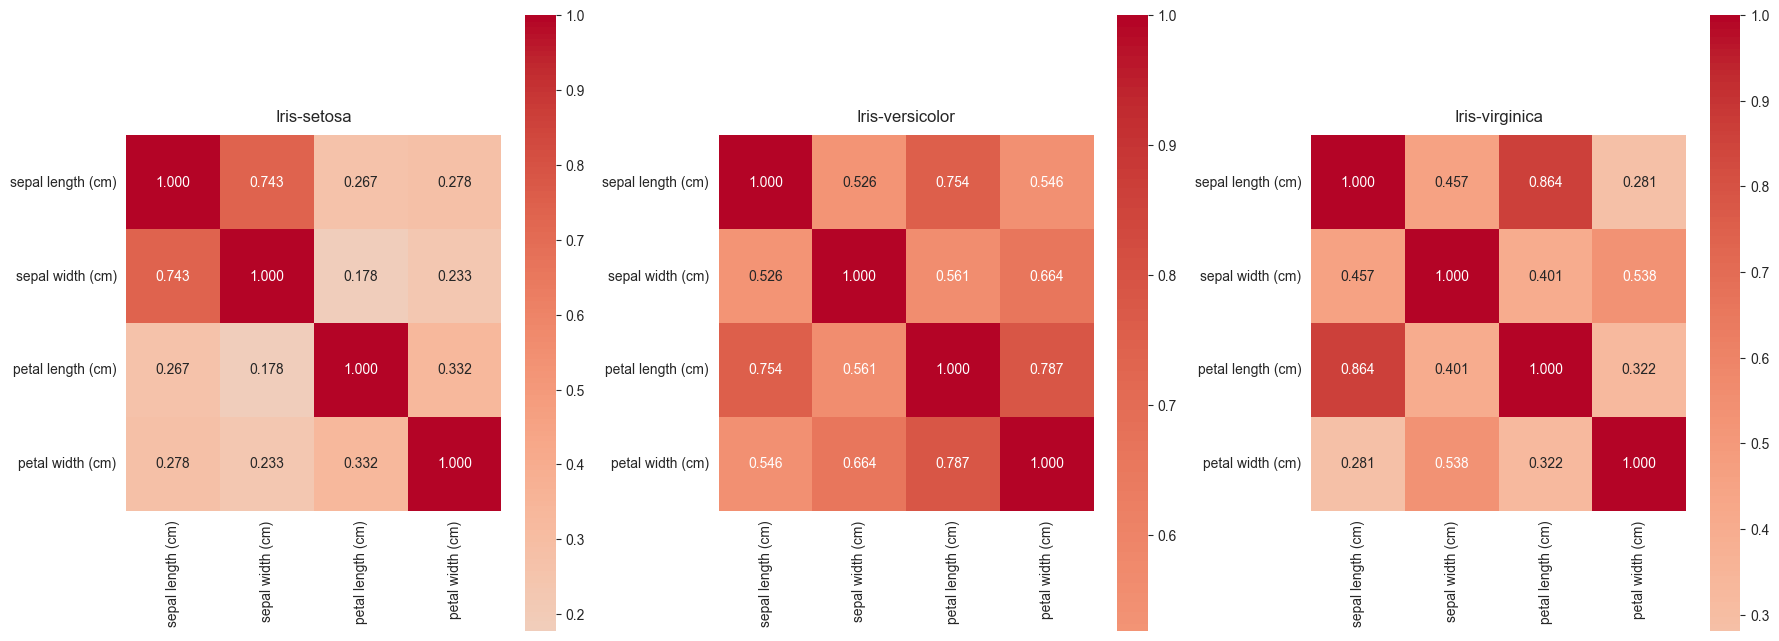

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

for i, target_class in enumerate(["Iris-setosa", "Iris-versicolor", "Iris-virginica"]):
    # 각 타겟별 데이터 추출
    target_data = df[df["target"] == target_class].drop(["target"], axis=1)

    # 상관관계 계산
    corr_matrix = target_data.corr()

    # 히트맵 그리기
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap="coolwarm",
        center=0,
        square=True,
        fmt=".3f",
        ax=axes[i],
        cbar_kws={"shrink": 0.8},
    )

    axes[i].set_title(f"{target_class}", fontsize=12, pad=10)

plt.tight_layout()
plt.show()

# Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix

## Dataset Definition

In [14]:
X = df.drop(["target"], axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
print(len(df), len(X_train), len(X_test))

150 120 30


In [16]:
print(120 / 150)

0.8


In [17]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6000,3.6000,1.0000,0.2000
15,5.7000,4.4000,1.5000,0.4000
65,6.7000,3.1000,4.4000,1.4000
11,4.8000,3.4000,1.6000,0.2000
42,4.4000,3.2000,1.3000,0.2000


In [18]:
y_train.head()

22        Iris-setosa
15        Iris-setosa
65    Iris-versicolor
11        Iris-setosa
42        Iris-setosa
Name: target, dtype: object

## Model

[Reference] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
model.score(X_train, y_train)

0.975

In [21]:
print(model.intercept_, model.coef_)

[  9.00953843   1.86864855 -10.87818698] [[-0.39352486  0.96242398 -2.37516107 -0.9987522 ]
 [ 0.50847792 -0.25477254 -0.21300601 -0.77574639]
 [-0.11495306 -0.70765144  2.58816708  1.77449859]]


In [22]:
X_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

클래스 0 (setosa) vs 나머지
- z₀ = 9.0095 - 0.3935×sepal_length + 0.9624×sepal_width - 2.3752×petal_length - 0.9988×petal_width

클래스 1 (versicolor) vs 나머지  
- z₁ = 1.8686 + 0.5085×sepal_length - 0.2548×sepal_width - 0.2130×petal_length - 0.7757×petal_width

클래스 2 (virginica) vs 나머지
- z₂ = -10.8782 - 0.1150×sepal_length - 0.7077×sepal_width + 2.5882×petal_length + 1.7745×petal_width

## Prediction

In [23]:
pred = model.predict(X_test)

In [28]:
print(accuracy_score(y_test, pred))

1.0


In [29]:
confusion_matrix(y_test, pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

## Metrics

In [30]:
# 모델 설명력 비교
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print("=== 모델의 설명계수(R²) ===")
print(f"훈련 데이터 R²: {train_r2:.4f}")
print(f"테스트 데이터 R²: {test_r2:.4f}")
print(f"R² 차이 (훈련 - 테스트): {train_r2 - test_r2:.4f}")

=== 모델의 설명계수(R²) ===
훈련 데이터 R²: 0.9750
테스트 데이터 R²: 1.0000
R² 차이 (훈련 - 테스트): -0.0250


In [ ]:
# 훈련 데이터와 테스트 데이터의 정확도 비교
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("=== 분류 모델 정확도 ===")
print(f"훈련 데이터 정확도: {train_accuracy:.4f}")
print(f"테스트 데이터 정확도: {test_accuracy:.4f}")
print(f"정확도 차이 (훈련 - 테스트): {train_accuracy - test_accuracy:.4f}")


print("\n=== 클래스별 정확도 ===")
classes = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

for class_name in classes:
    # 해당 클래스만 필터링
    class_mask = y_test == class_name
    if class_mask.sum() > 0:  # 해당 클래스가 테스트 데이터에 존재하는 경우
        class_accuracy = accuracy_score(y_test[class_mask], pred[class_mask])
        print(f"{class_name}: {class_accuracy:.4f} ({class_mask.sum()}개 샘플)")
    else:
        print(f"{class_name}: 해당 클래스가 테스트 데이터에 없습니다.")

=== 분류 모델 정확도 ===
훈련 데이터 정확도: 0.9750
테스트 데이터 정확도: 1.0000
정확도 차이 (훈련 - 테스트): -0.0250

=== 클래스별 정확도 ===
Iris-setosa: 1.0000 (10개 샘플)
Iris-versicolor: 1.0000 (9개 샘플)
Iris-virginica: 1.0000 (11개 샘플)


----
End of Documents